In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit

In [17]:
ttdm2wt = np.load('mode3_allpars_wtpmlkl_ttds.npy')
ttdm2r1kd = np.load('mode3_allpars_rip1kd_ttds.npy')
ttdm2r1oe = np.load('mode3_allpars_rip1oe_ttds.npy')
ttdm2r3kd = np.load('mode3_allpars_c8kd_ttds.npy')
ttdm2r3oe = np.load('mode3_allpars_c8oe_ttds.npy')
ttdm2traddkd = np.load('mode3_allpars_traddkd_ttds.npy')
ttdm2traddoe = np.load('mode3_allpars_traddoe_ttds.npy')

In [18]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2r1kd2 = [ttdm2r1kd / 60 for ttdm2r1kd in ttdm2r1kd]
ttdm2r1oe2 = [ttdm2r1oe / 60 for ttdm2r1oe in ttdm2r1oe]
ttdm2r3kd2 = [ttdm2r3kd / 60 for ttdm2r3kd in  ttdm2r3kd]
ttdm2r3oe2 = [ ttdm2r3oe/ 60 for  ttdm2r3oe in ttdm2r3oe]
ttdm2traddkd2 = [ttdm2traddkd / 60 for ttdm2traddkd in ttdm2traddkd]
ttdm2traddoe2 = [ttdm2traddoe/60 for ttdm2traddoe in ttdm2traddoe]

In [83]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode3iwt = pd.DataFrame({'WT': ttdm2wt2,
                         'C8 KD': ttdm2r3kd2,
                         'C8 OE': ttdm2r3oe2,
                         'RIP1 KD': ttdm2r1kd2,
                          'RIP1 OE': ttdm2r1oe2,
                        'TRADD KD': ttdm2traddkd2,
                          'TRADD OE': ttdm2traddoe2})
dfimode3hr = pd.DataFrame(data = mode3iwt,
                       columns = ['WT','C8 KD','C8 OE','RIP1 KD','RIP1 OE','TRADD KD','TRADD OE'])

In [85]:
from scipy.stats import ks_2samp
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['C8 KD']))
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['C8 OE']))
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['RIP1 KD']))
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['RIP1 OE']))
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['TRADD KD']))
print(ks_2samp(dfimode3hr['WT'], dfimode3hr['TRADD OE']))

Ks_2sampResult(statistic=0.0186092066601371, pvalue=0.8683361135668015)
Ks_2sampResult(statistic=0.09353574926542596, pvalue=3.0349561661619076e-08)
Ks_2sampResult(statistic=0.03623898139079329, pvalue=0.13404243779781846)
Ks_2sampResult(statistic=0.05631733594515187, pvalue=0.002927859555292376)
Ks_2sampResult(statistic=0.8330068560235064, pvalue=0.0)
Ks_2sampResult(statistic=0.35602350636630753, pvalue=1.0538724323820042e-113)


In [44]:
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['C8 KD']))
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['C8 OE']))
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['RIP1 KD']))
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['RIP1 OE']))
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['TRADD KD']))
print(ttest_ind(dfimode3hr['WT'], dfimode3hr['TRADD OE']))

Ttest_indResult(statistic=-0.33719231917758347, pvalue=0.7359892630028589)
Ttest_indResult(statistic=-4.0482696507338565, pvalue=5.255418478877067e-05)
Ttest_indResult(statistic=-2.3158603537113134, pvalue=0.020615206421576007)
Ttest_indResult(statistic=4.268739189453889, pvalue=2.0104622770094293e-05)
Ttest_indResult(statistic=-35.14108183519419, pvalue=1.3698701486934887e-236)
Ttest_indResult(statistic=21.310787574454274, pvalue=1.2249862232304065e-95)


In [88]:
from scipy.stats import median_test
print(median_test(dfimode3hr['WT'], dfimode3hr['C8 KD']))
print(median_test(dfimode3hr['WT'], dfimode3hr['C8 OE']))
print(median_test(dfimode3hr['WT'], dfimode3hr['RIP1 KD']))
print(median_test(dfimode3hr['WT'], dfimode3hr['RIP1 OE']))
print(median_test(dfimode3hr['WT'], dfimode3hr['TRADD KD']))
print(median_test(dfimode3hr['WT'], dfimode3hr['TRADD OE']))

(0.8240508637236085, 0.36399844442762597, 10.280561122244489, array([[1015,  985],
       [1027, 1057]]))
(34.511994934849014, 4.236326619099257e-09, 10.340681362725451, array([[ 838, 1026],
       [1204, 1016]]))
(2.409313429197908, 0.12061525534009623, 10.340681362725451, array([[ 838,  888],
       [1204, 1154]]))
(12.554165158039888, 0.0003953241697063131, 10.280561122244489, array([[1015,  901],
       [1027, 1141]]))
(2561.3251329787236, 0.0, 10.641282565130261, array([[ 199, 1817],
       [1843,  225]]))
(344.46487435328896, 6.800154206030012e-77, 10.220440881763526, array([[1197,  607],
       [ 845, 1435]]))


No handles with labels found to put in legend.


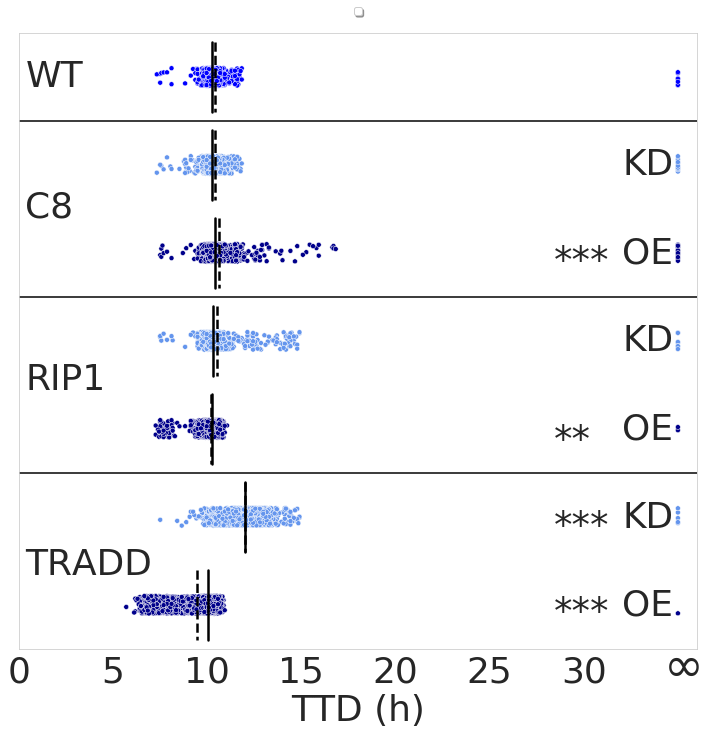

In [129]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (10,10))
my_pal = {"WT": "blue",
          "C8 KD": "cornflowerblue", "C8 OE":"darkblue",
          "RIP1 KD":"cornflowerblue", "RIP1 OE":"darkblue",
         "TRADD KD": "cornflowerblue", "TRADD OE":"darkblue",}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfimode3hr), marker = 'o',linewidth=0.5,
                  size=5, palette=my_pal, edgecolor="white")
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
medianprops = dict(linestyle = '-', linewidth=2.5, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfimode3hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('C8', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 36)
plt.annotate('RIP1', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 36)
plt.annotate('TRADD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 36)

plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 36)#(-0.2,.7)
plt.annotate('KD', xy = (0.89,.77), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.625), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.483), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.34), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.197), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.055), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)

plt.annotate('***', xy = (0.79,.61), xycoords ='axes fraction', fontsize = 37)#c8oe 
# plt.annotate('**', xy = (0.79,.47), xycoords ='axes fraction', fontsize = 37) #r1kd
plt.annotate('**', xy = (0.79,.32), xycoords ='axes fraction', fontsize = 37) #r1oe
plt.annotate('***', xy = (0.79,.18), xycoords ='axes fraction', fontsize = 37) #traddkd
plt.annotate('***', xy = (0.79,.04), xycoords ='axes fraction', fontsize = 37) #traddoe
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 48)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 36)
b.set_ylabel("")
b.tick_params(labelsize=36)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
b.set_xlabel("TTD (h)",fontsize = 36)
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode3_initsens__100tnf_stripdots_hrs_kdoeinside_edgewhite_medwsig.pdf')

In [13]:
dfmode3hr = pd.read_csv("mode3_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


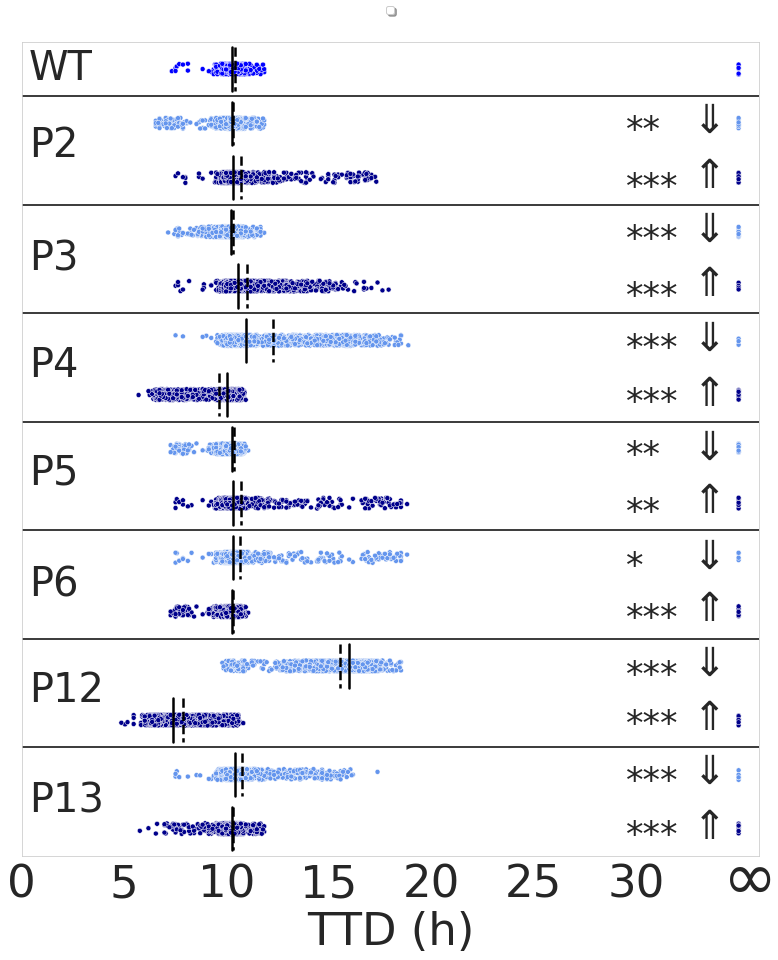

In [127]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (11,13))
my_pal = {"WT": "blue",
          'P2 KD': "cornflowerblue",'P2 OE':"darkblue",
          'P3 KD': "cornflowerblue",'P3 OE':"darkblue",
          'P4 KD': "cornflowerblue",'P4 OE':"darkblue",
          'P5 KD': "cornflowerblue",'P5 OE':"darkblue",
          'P6 KD': "cornflowerblue",'P6 OE':"darkblue",
          'P12 KD': "cornflowerblue",'P12 OE':"darkblue",
          'P13 KD': "cornflowerblue",'P13 OE':"darkblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode3hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor="white")
medianprops = dict(linestyle = '-', linewidth=2.5, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode3hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)

plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
plt.annotate('WT', xy = (0.01,.955), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate(r'$\Downarrow$', xy = (0.90,.89), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.822), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.756), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Uparrow$', xy = (0.90,.689), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Downarrow$', xy = (0.90,.622), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Uparrow$', xy = (0.90,.554), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)

plt.annotate(r'$\Downarrow$', xy = (0.90,.488), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.422), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.354), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Uparrow$', xy = (0.90,.290), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)

plt.annotate(r'$\Downarrow$', xy = (0.90,.222), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Uparrow$', xy = (0.90,.156), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)

plt.annotate(r'$\Downarrow$', xy = (0.90,.089), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.022), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)

plt.annotate('P2', xy = (0.01,.86), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate('P3', xy = (0.01,.72), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P4', xy = (0.01,.59), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P5', xy = (0.01,.458), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P6', xy = (0.01,.32), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P12', xy = (0.01,.19), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P13', xy = (0.01,.054), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)

plt.annotate('**', xy = (0.82,.88), xycoords ='axes fraction', fontsize = 35) #p2kd
plt.annotate('***', xy = (0.82,.81), xycoords ='axes fraction', fontsize = 35) #p2oe
plt.annotate('***', xy = (0.82,.745), xycoords ='axes fraction', fontsize = 35) #p3kd
plt.annotate('***', xy = (0.82,.675), xycoords ='axes fraction', fontsize = 35) #p3oe
plt.annotate('***', xy = (0.82,.612), xycoords ='axes fraction', fontsize = 35) #p4kd
plt.annotate('***', xy = (0.82,.545), xycoords ='axes fraction', fontsize = 35) #p4oe
plt.annotate('**', xy = (0.82,.48), xycoords ='axes fraction', fontsize = 35) #p5kd
plt.annotate('**', xy = (0.82,.41), xycoords ='axes fraction', fontsize = 35) #p5oe
plt.annotate('*', xy = (0.82,.344), xycoords ='axes fraction', fontsize = 35) #p6kd
plt.annotate('***', xy = (0.82,.28), xycoords ='axes fraction', fontsize = 35) #p6oe
plt.annotate('***', xy = (0.82,.21), xycoords ='axes fraction', fontsize = 35) #p12kd
plt.annotate('***', xy = (0.82,0.15), xycoords ='axes fraction', fontsize = 35) #p12oe
plt.annotate('***', xy = (0.82,0.08), xycoords ='axes fraction', fontsize = 35) #p13kd
plt.annotate('***', xy = (0.82,0.013), xycoords ='axes fraction', fontsize = 35) #p13oe
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 65)
b.tick_params(labelsize=45)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
b.set_xlabel("TTD (h)",fontsize = 45)
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode3_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_medwsig.pdf')

In [77]:
from scipy.stats import ks_2samp
#KS TEST
print('P2KD','P2OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P2 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P2 OE']))
print('P3KD','P3OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P3 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P3 OE']))
print('P4KD','P4OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P4 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P4 OE']))
print('P5KD','P5OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P5 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P5 OE']))
print('P6KD','P6OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P6 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P6 OE']))
print('P12KD','P12OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P12 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P12 OE']))
print('P13KD','P13OE')
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P13 KD']))
print(ks_2samp(dfmode3hr['WT'], dfmode3hr['P13 OE']))

P2KD P2OE
Ks_2sampResult(statistic=0.047012732615083264, pvalue=0.021173284811042085)
Ks_2sampResult(statistic=0.10626836434867781, pvalue=1.616469270307825e-10)
P3KD P3OE
Ks_2sampResult(statistic=0.10920666013712044, pvalue=4.392817280311895e-11)
Ks_2sampResult(statistic=0.32174338883447606, pvalue=6.121047388537735e-93)
P4KD P4OE
Ks_2sampResult(statistic=0.49020568070519094, pvalue=3.505655951094464e-215)
Ks_2sampResult(statistic=0.352105778648384, pvalue=3.1778054839162796e-111)
P5KD P5OE
Ks_2sampResult(statistic=0.05239960822722822, pvalue=0.007033891589344407)
Ks_2sampResult(statistic=0.059255631733594605, pvalue=0.0014556690731789828)
P6KD P6OE
Ks_2sampResult(statistic=0.056807051909892325, pvalue=0.0026124056442993243)
Ks_2sampResult(statistic=0.05288932419196868, pvalue=0.006325797516193949)
P12KD P12OE
Ks_2sampResult(statistic=0.9382957884427032, pvalue=0.0)
Ks_2sampResult(statistic=0.8858961802154751, pvalue=0.0)
P13KD P13OE
Ks_2sampResult(statistic=0.15181194906953976, pvalu

In [78]:
from scipy.stats import ttest_ind
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P2 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P2 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P3 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P3 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P4 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P4 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P5 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P5 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P6 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P6 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P12 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P12 OE']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P13 KD']))
print(ttest_ind(dfmode3hr['WT'], dfmode3hr['P13 OE']))

Ttest_indResult(statistic=1.4149481462533338, pvalue=0.1571599779580119)
Ttest_indResult(statistic=-5.767803134874238, pvalue=8.6257546037572e-09)
Ttest_indResult(statistic=1.570866539575075, pvalue=0.1162911562661414)
Ttest_indResult(statistic=-12.786759735897686, pvalue=9.76855736242514e-37)
Ttest_indResult(statistic=-29.060785017713872, pvalue=6.228892151988977e-169)
Ttest_indResult(statistic=11.767634587779042, pvalue=1.8375386599865766e-31)
Ttest_indResult(statistic=0.7833322656128499, pvalue=0.4334774655149406)
Ttest_indResult(statistic=-5.290628120032273, pvalue=1.2829232784910152e-07)
Ttest_indResult(statistic=-4.787086628977409, pvalue=1.7521175098723925e-06)
Ttest_indResult(statistic=1.043857783264585, pvalue=0.2966130058006276)
Ttest_indResult(statistic=-106.36089696533877, pvalue=0.0)
Ttest_indResult(statistic=44.498549350072274, pvalue=0.0)
Ttest_indResult(statistic=-6.819513408105793, pvalue=1.0476971905018504e-11)
Ttest_indResult(statistic=1.2102078495716768, pvalue=0.22

In [79]:
#Median Test
from scipy.stats import median_test
print('P2KD','P2OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P2 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P2 OE']))
print('P3KD','P3OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P3 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P3 OE']))
print('P4KD','P4OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P4 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P4 OE']))
print('P5KD','P5OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P5 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P5 OE']))
print('P6KD','P6OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P6 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P6 OE']))
print('P12KD','P12OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P12 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P12 OE']))
print('P13KD','P13OE')
print(median_test(dfmode3hr['WT'], dfmode3hr['P13 KD']))
print(median_test(dfmode3hr['WT'], dfmode3hr['P13 OE']))

P2KD P2OE
(6.9265012240541965, 0.00849276719544259, 10.280561122244489, array([[1015,  930],
       [1027, 1112]]))
(29.915005577890504, 4.5140578106262253e-08, 10.340681362725453, array([[ 838, 1013],
       [1204, 1029]]))
P3KD P3OE
(36.857966219307016, 1.2705587880425722e-09, 10.280561122244489, array([[1015,  821],
       [1027, 1221]]))
(301.14998071930796, 1.850251971965342e-67, 10.400801603206414, array([[ 700, 1255],
       [1342,  787]]))
P4KD P4OE
(664.7469867589455, 1.386713945927506e-146, 10.460921843687377, array([[ 563, 1387],
       [1479,  655]]))
(325.4221925600901, 9.546864586913339e-73, 10.220440881763524, array([[1197,  623],
       [ 845, 1419]]))
P5KD P5OE
(10.628428024037103, 0.0011136233879039232, 10.280561122244489, array([[1015,  910],
       [1027, 1132]]))
(6.714669503077873, 0.009562301045382183, 10.340681362725453, array([[ 838,  921],
       [1204, 1121]]))
P6KD P6OE
(6.234942152189058, 0.012525368464641699, 10.340681362725453, array([[ 838,  918],
      

In [36]:
print(ttdm2wt2.count(35))
print(ttdm2r1kd2.count(35))
print(ttdm2r1oe2.count(35))
print(ttdm2r3kd2.count(35))
print(ttdm2r3oe2.count(35))
print(ttdm2traddkd2.count(35))
print(ttdm2traddoe2.count(35))

7
7
2
10
15
5
1
